In [27]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Contenido_de_Nitrogeno: Proporción de contenido de nitrógeno en el
suelo.
Contenido_de_Fosforo: Proporción de contenido de fósforo en el suelo.
Contenido_de_Potasio: Proporción de contenido de potasio en el suelo.
Temperatura_C: Temperatura en grados Celsius.
Humedad_Relativa: Humedad relativa en porcentaje.
Nivel_de_pH: Nivel de pH del suelo.
Precipitacion_mm: Cantidad de precipitación en milímetros.
Tipo_de_Cultivo: Tipo de cultivo recomendado en función de los
parámetros anteriores.

a. Análisis Exploratorio de Datos (EDA)
Para realizar un EDA exhaustivo del dataset, considere las siguientes
preguntas:

¿Cómo se distribuyen los valores en cada una de las variables?

¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?

¿Cómo varía la recomendación de cultivo según las condiciones del
suelo y el clima?

¿Existen valores atípicos o faltantes que deban ser tratados?


In [59]:
df = pd.read_csv('tipo_cultivo.csv')
cultivos = df.copy()
cultivos.shape


(2200, 9)

Los datos tienen 2200 filas y 9 columnas

In [60]:
cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.880,82.003,6.503,202.936,rice
1,1,85,58,41,21.770,80.320,7.038,226.656,rice
2,2,60,55,44,23.004,82.321,7.840,263.964,rice
3,3,74,35,40,26.491,80.158,6.980,242.864,rice
4,4,78,42,42,20.130,81.605,7.628,262.717,rice


In [61]:
cultivos.tail()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
2195,2195,107,34,32,26.775,66.413,6.780,177.775,coffee
2196,2196,99,15,27,27.417,56.636,6.087,127.925,coffee
2197,2197,118,33,30,24.132,67.225,6.363,173.323,coffee
2198,2198,117,32,34,26.272,52.127,6.759,127.175,coffee
2199,2199,104,18,30,23.603,60.396,6.780,140.937,coffee


Tipos de datos

In [62]:
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Contenido_de_Nitrogeno  2200 non-null   int64  
 2   Contenido_de_Fosforo    2200 non-null   int64  
 3   Contenido_de_Potasio    2200 non-null   int64  
 4   Temperatura_C           2200 non-null   float64
 5   Humedad_Relativa        2200 non-null   float64
 6   Nivel_de_pH             2200 non-null   float64
 7   Precipitacion_mm        2200 non-null   float64
 8   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [63]:
cultivos = cultivos.drop(columns=['Unnamed: 0']) #borro esta columna para not ener doble indice

Con validate columns puedo ver las columnas con sus nombres, la cantidad de valores unicos por columna (y cuales son), la cantidad y % de nulos y una muestra de valores de esa columna

In [64]:
from funciones_importantes import validate_columns


In [65]:
validate_columns(cultivos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,Contenido_de_Nitrogeno,"[90, 85, 60, 74, 78, 69, 94, 89, 68, 91, 93, 7...",137,0,"[30, 37, 35, 37, 1]",0.000
1,Contenido_de_Fosforo,"[42, 58, 55, 35, 37, 53, 54, 46, 56, 50, 48, 3...",117,0,"[14, 60, 46, 31, 54]",0.000
2,Contenido_de_Potasio,"[43, 41, 44, 40, 42, 38, 36, 37, 39, 35, 45, 1...",73,0,"[32, 20, 31, 19, 20]",0.000
3,Temperatura_C,"[20.87974371, 21.77046169, 23.00445915, 26.491...",2200,0,"[27.93114233, 26.21667586, 19.14729038, 29.193...",0.000
4,Humedad_Relativa,"[82.00274423, 80.31964408, 82.3207629, 80.1583...",2200,0,"[93.14554876, 81.24995984, 84.16390229, 18.907...",0.000
5,Nivel_de_pH,"[6.502985292000001, 7.038096361, 7.840207144, ...",2200,0,"[6.962386495, 6.259086582999999, 7.489545074, ...",0.000
6,Precipitacion_mm,"[202.9355362, 226.6555374, 263.9642476, 242.86...",2200,0,"[61.82980133, 122.7418744, 103.1969341, 144.68...",0.000
7,Tipo_de_Cultivo,"[rice, maize, chickpea, kidneybeans, pigeonpea...",22,0,"[mango, mungbean, orange, watermelon, coffee]",0.000


Se observa que los datos no tienen valores nulos, por lo tanto sigo con el analisis 

In [66]:
cultivos.describe() #medidas estdisticas simples para cada columna


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


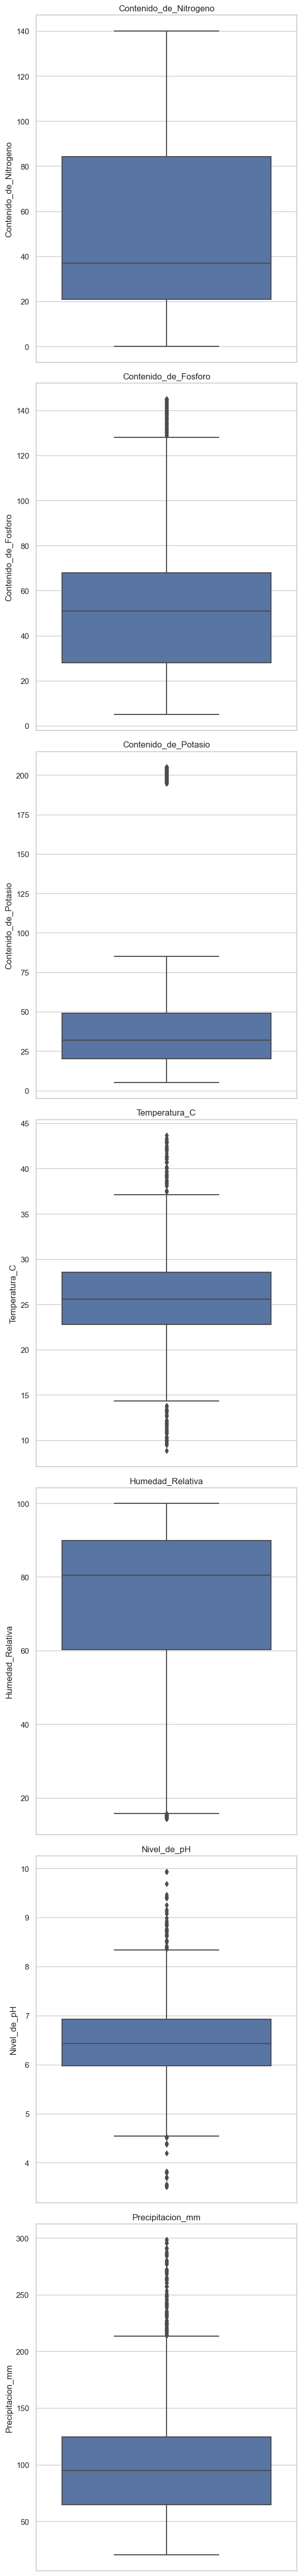

In [67]:
from funciones_importantes import grafico_out_boxplot
grafico_out_boxplot(cultivos)

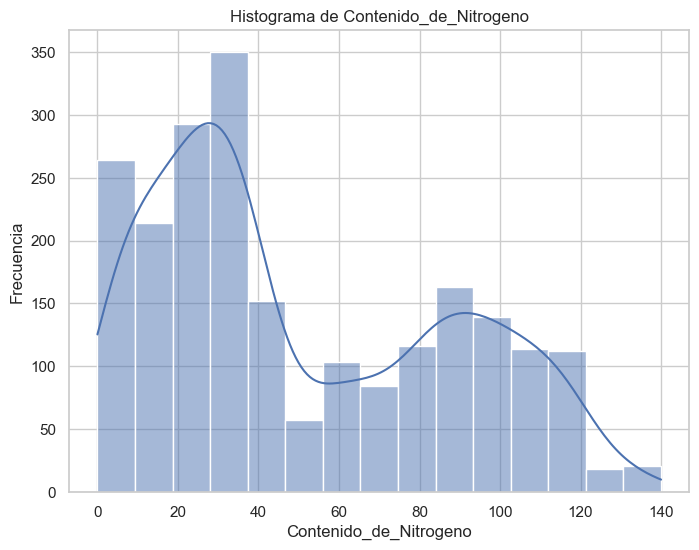

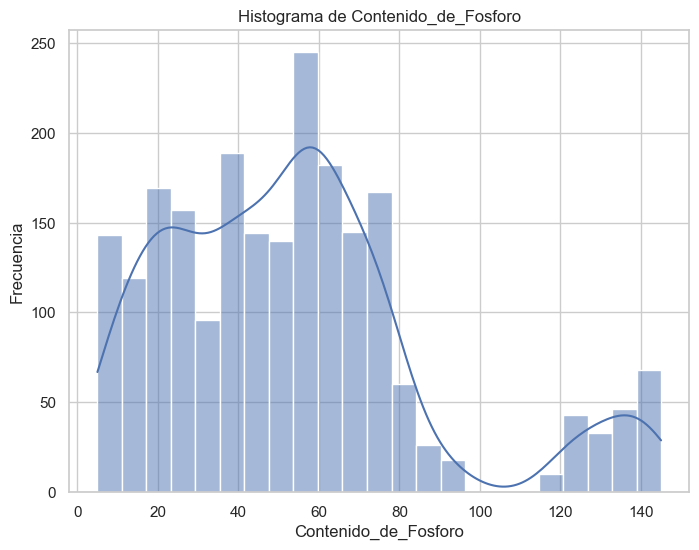

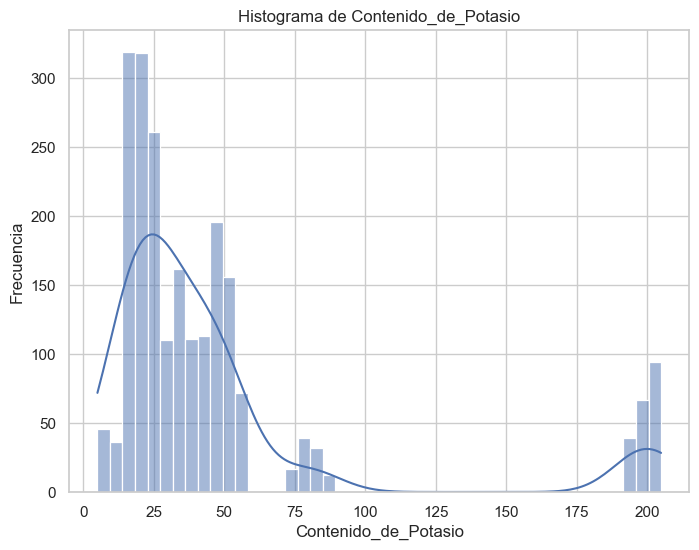

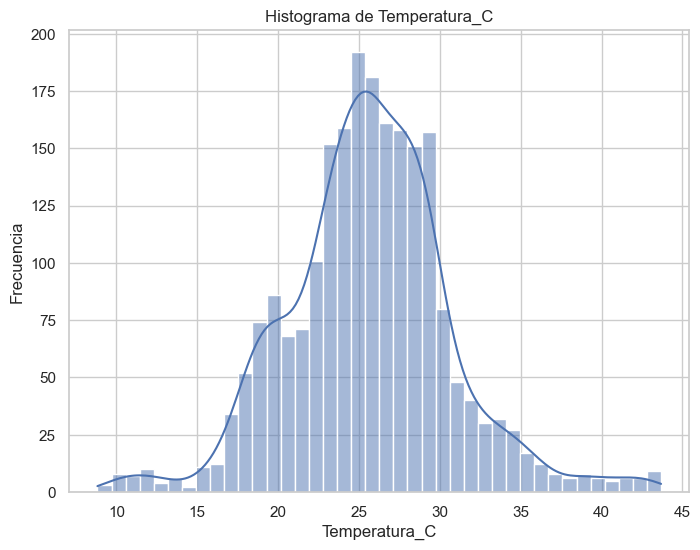

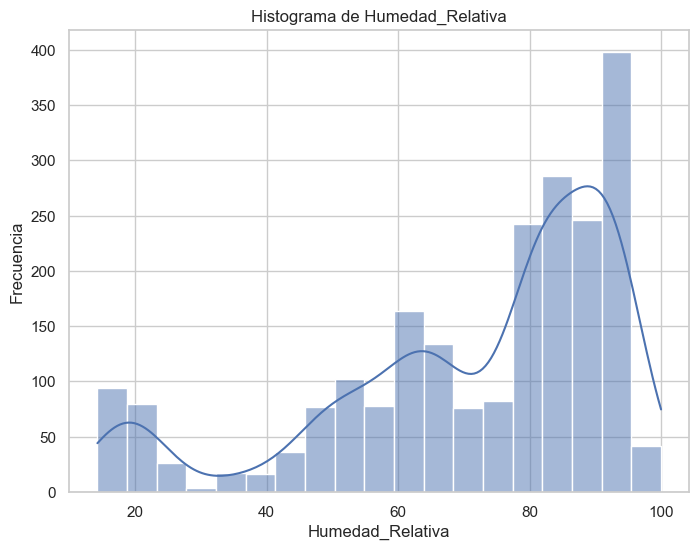

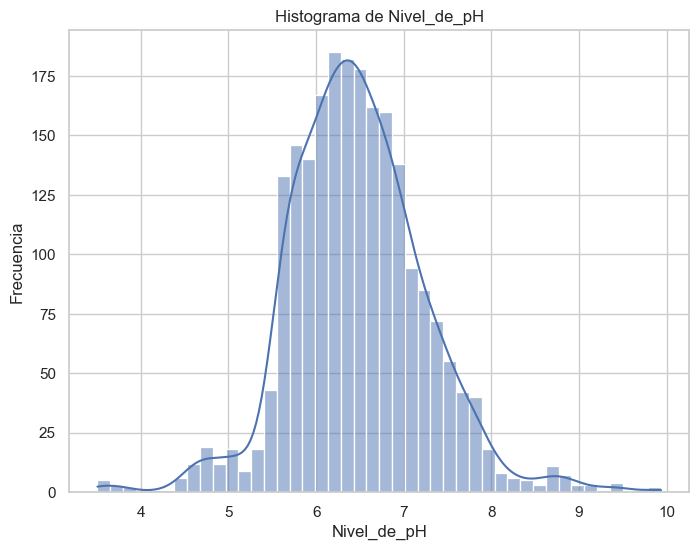

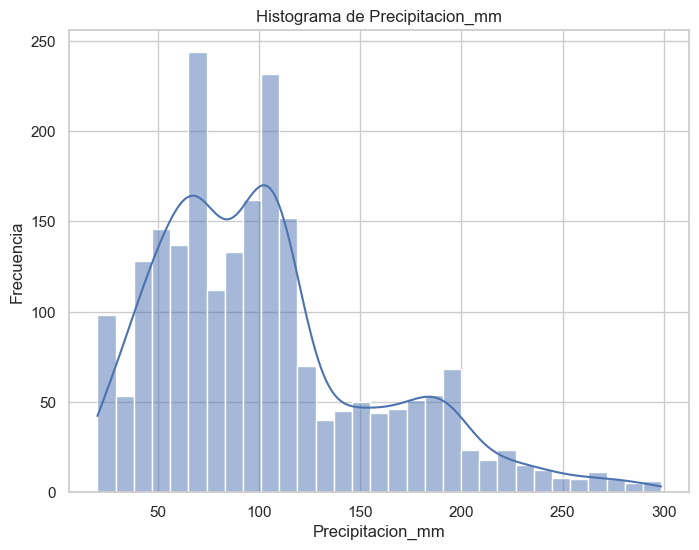

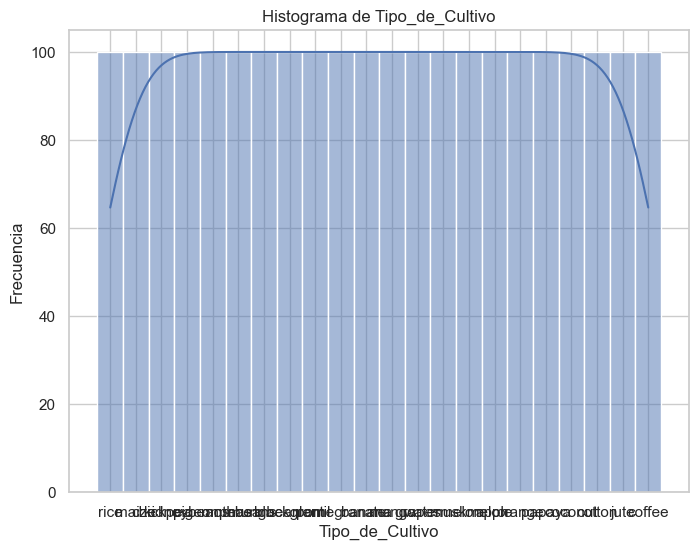

In [68]:
from funciones_importantes import plot_histograms

plot_histograms(cultivos)

In [69]:
from sklearn.preprocessing import OneHotEncoder

tipodecultivo_ohe = OneHotEncoder(sparse=False)
tipodecultivo_ohe.fit(cultivos[['Tipo_de_Cultivo']])
tipodecultivo_ohe.categories_

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [70]:
cultivos.columns

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

In [71]:
cultivos['apple'],cultivos['banana'],cultivos['blackgram'],cultivos['chickpea'],cultivos['coconut'],cultivos['coffee'],cultivos['cotton'],cultivos['grapes'],cultivos['jute'],cultivos['kidneybeans'],cultivos['lentil'],cultivos['maize'],cultivos['mango'],cultivos['mothbeans'],cultivos['mungbean'],cultivos['muskmelon'],cultivos['orange'],cultivos['papaya'],cultivos['pigeonpeas'],cultivos['pomegranate'],cultivos['rice'],cultivos['watermelon'] = tipodecultivo_ohe.fit_transform(cultivos[['Tipo_de_Cultivo']]).T 
#cultivos.drop(columns=['Tipo_de_Cultivo'], inplace=True) 
cultivos.head()

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


#tengo que hacer un boxplot de la relacion de cada uno por tipo de cultivo

In [72]:
cultivos2=cultivos.drop(columns=['Tipo_de_Cultivo'])
cultivos2

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,apple,banana,blackgram,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.775,66.413,6.780,177.775,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2196,99,15,27,27.417,56.636,6.087,127.925,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2197,118,33,30,24.132,67.225,6.363,173.323,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2198,117,32,34,26.272,52.127,6.759,127.175,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<Axes: >

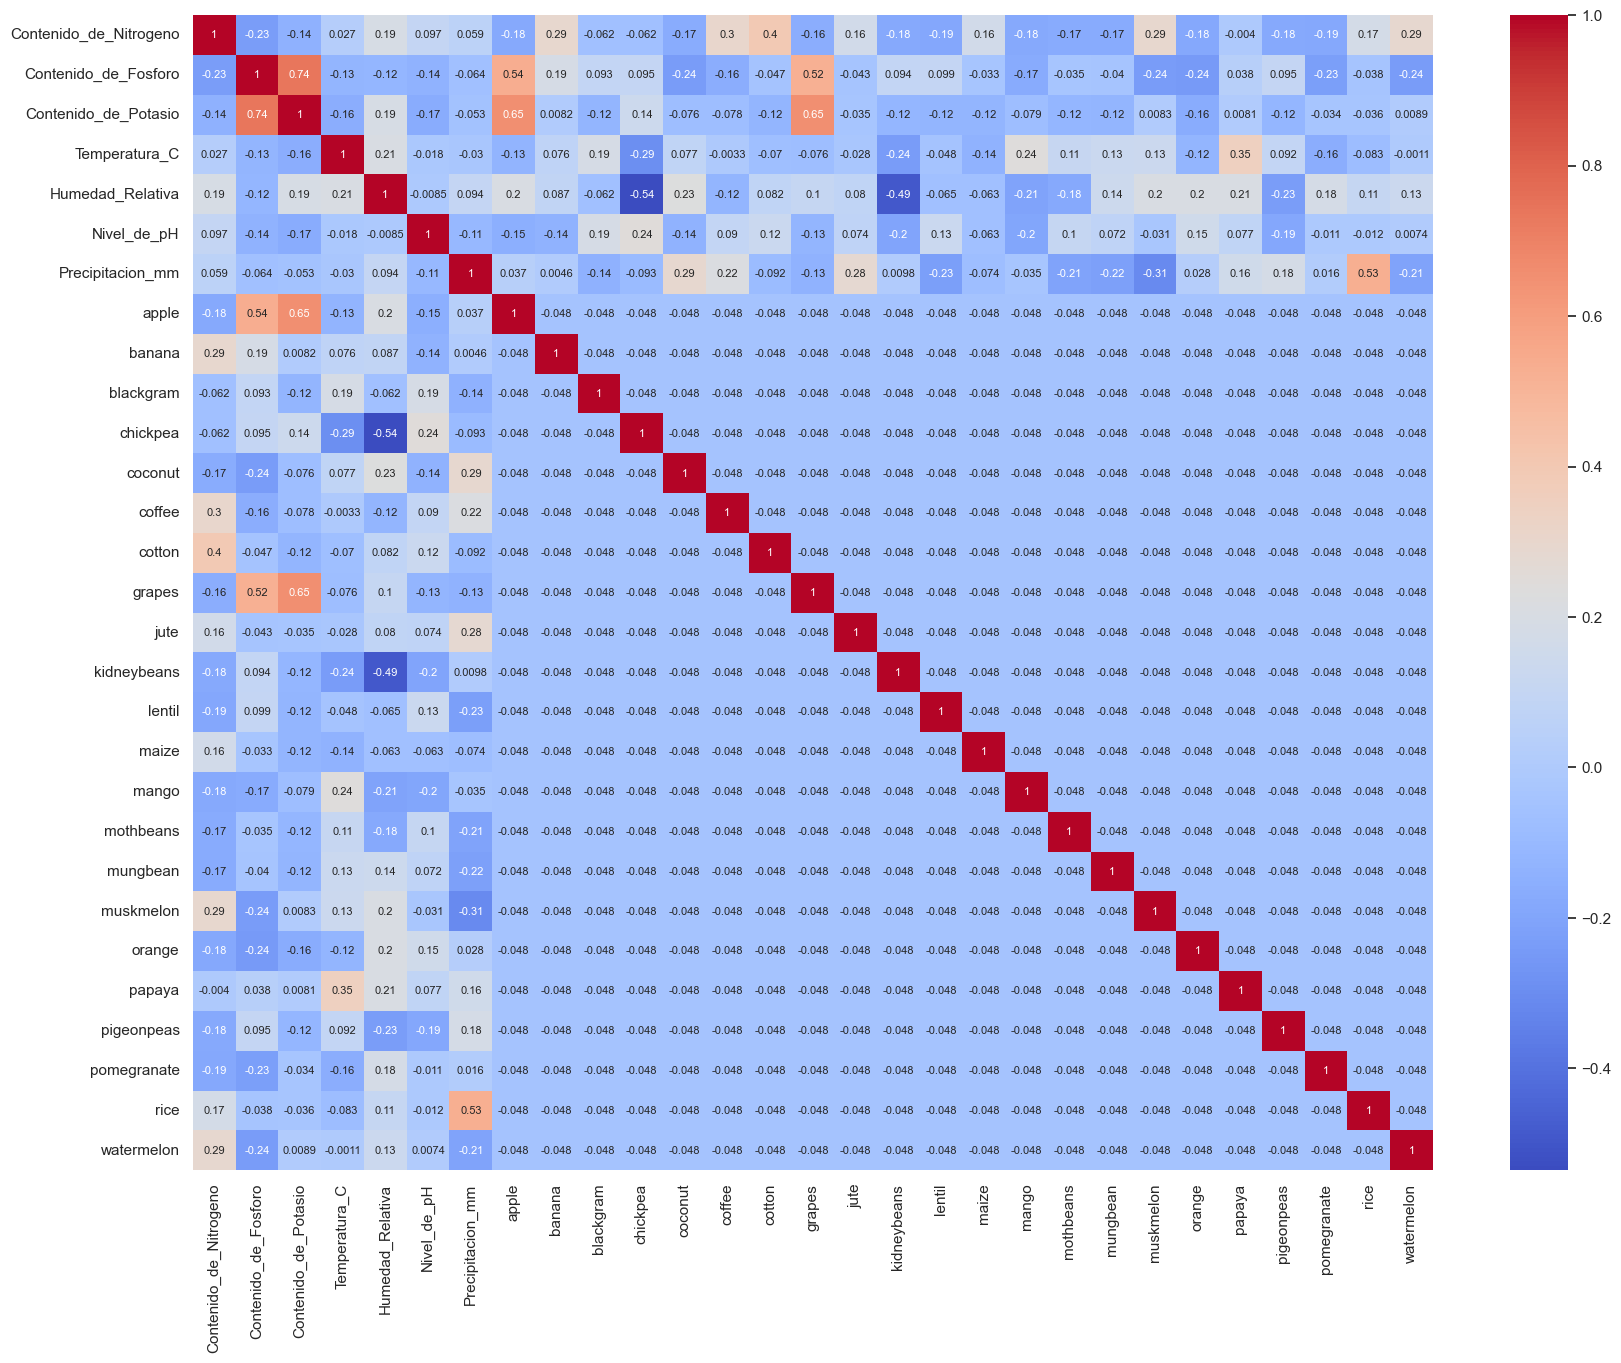

In [73]:
plt.figure(figsize=(20,15))
sns.heatmap(cultivos2.corr(),cmap = 'coolwarm',annot = True,annot_kws= {"size":8})

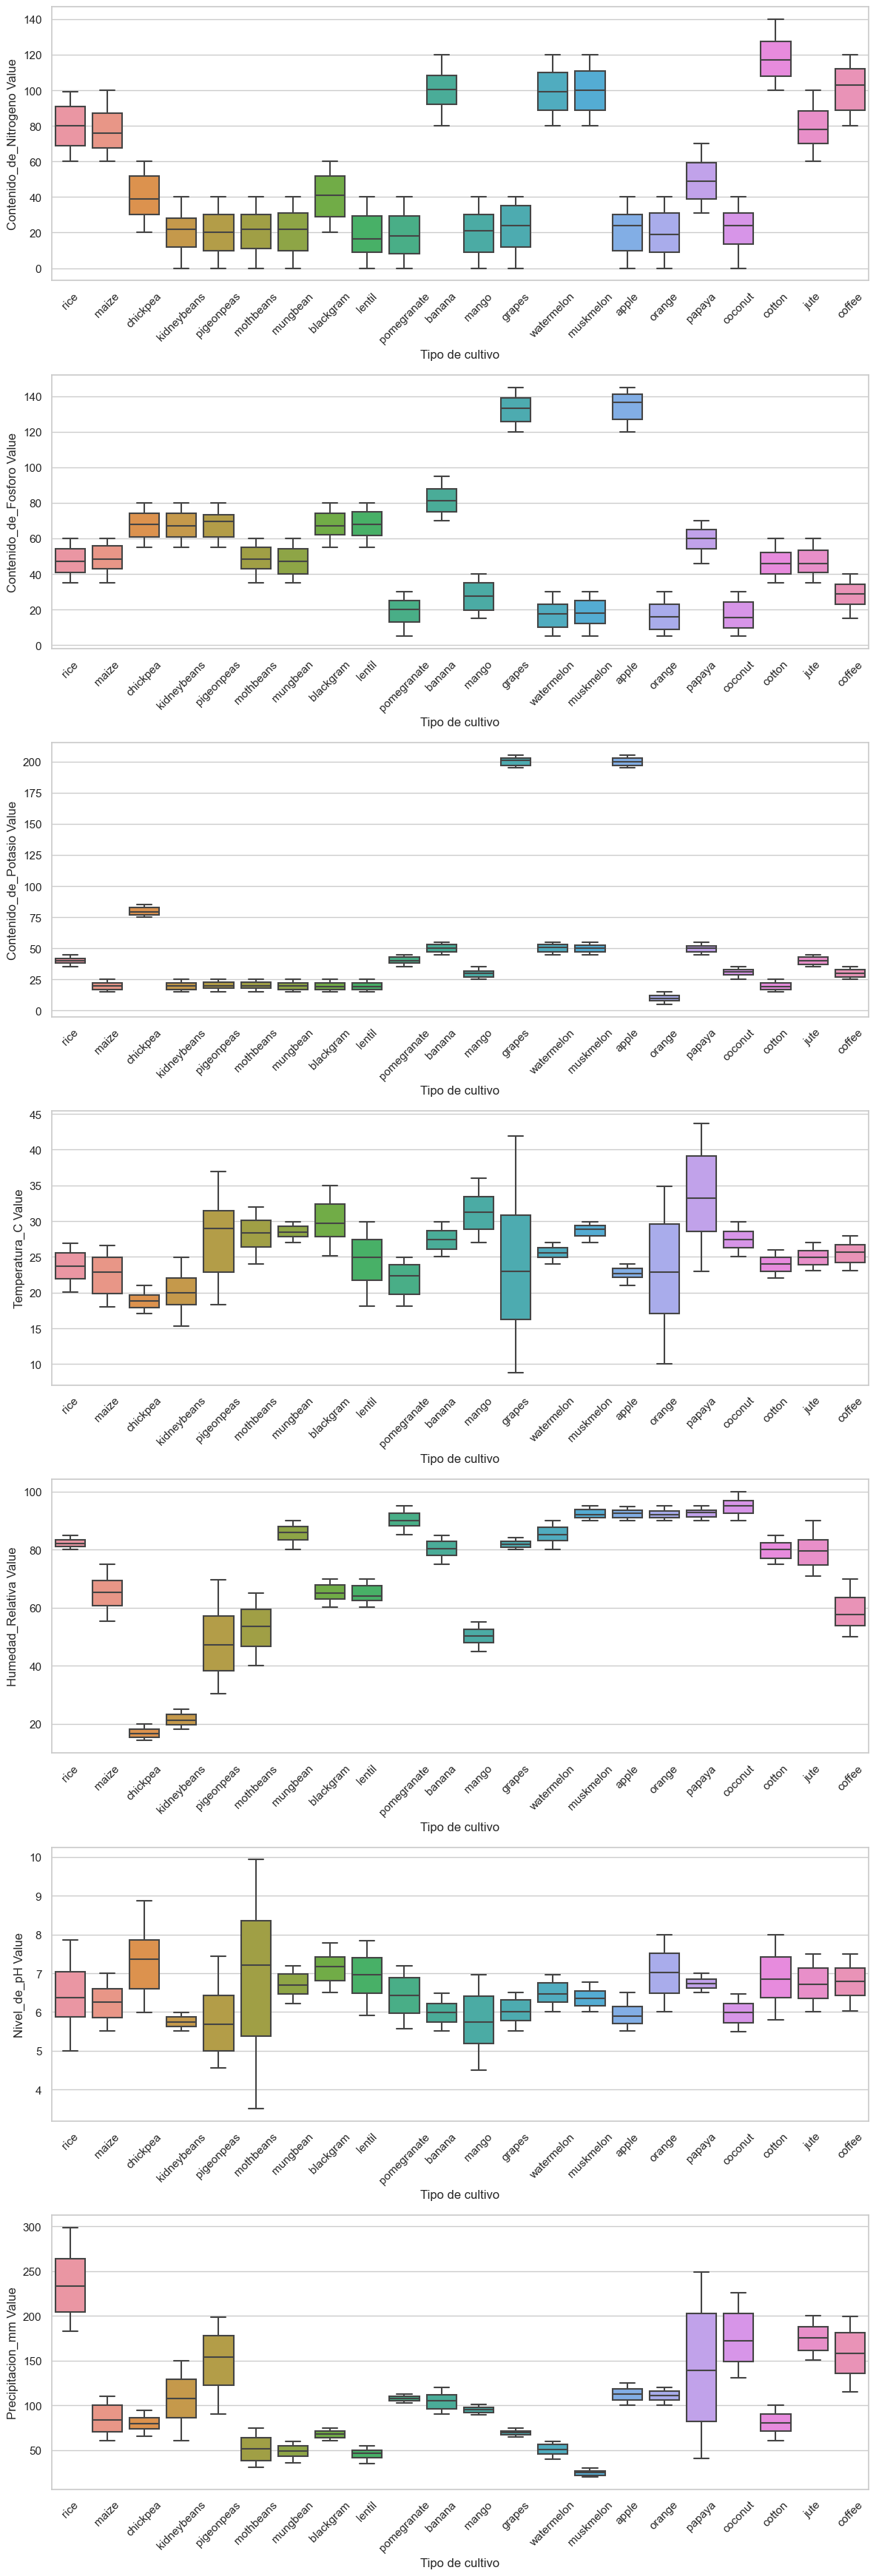

In [74]:
sns.set(style='whitegrid')
columns_to_plot= ['Contenido_de_Nitrogeno','Contenido_de_Fosforo','Contenido_de_Potasio','Temperatura_C','Humedad_Relativa','Nivel_de_pH','Precipitacion_mm']
fig,axes = plt.subplots(len(columns_to_plot),1,figsize=(12,5*len(columns_to_plot)))

for i,column in enumerate(columns_to_plot):
    sns.boxplot(data=df, x='Tipo_de_Cultivo',y=column, ax=axes[i])
    axes[i].set_ylabel(f'{column} Value')
    axes[i].set_xlabel('Tipo de cultivo')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout() #para que no se pisen los graficos
plt.show()

 Machine Learning

En esta sección, implementaremos dos modelos de Machine Learning
para predecir el Tipo_de_Cultivo basándonos en las variables del suelo
y del clima. Utilizaremos una Regresión Logística y un Árbol de
Decisión.
Consigna para la Implementación del Código:
Utilice el siguiente código de Python como base para implementar el
modelo de Árbol de Decisión:

Arbol de decision

In [75]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder

In [76]:
cultivos['Tipo_de_Cultivo'] = LE().fit_transform(cultivos['Tipo_de_Cultivo'])

cultivos.sample(5)

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
754,22,55,20,33.953,69.961,7.424,61.164,2,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
307,26,80,18,19.325,23.333,5.581,104.778,9,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
624,33,60,15,28.952,81.671,6.511,56.511,14,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1661,12,6,8,30.848,92.868,6.389,107.414,16,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1056,83,94,47,27.399,81.105,6.469,112.136,1,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [77]:
from sklearn.model_selection import train_test_split
X = cultivos[['Contenido_de_Nitrogeno','Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Temperatura_C' ,'Humedad_Relativa', 'Nivel_de_pH', 'Precipitacion_mm']]
y = cultivos[['Tipo_de_Cultivo']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Puntuación de validación cruzada: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Precisión en entrenamiento = 0.8875
Precisión en pruebas = 0.865909090909091


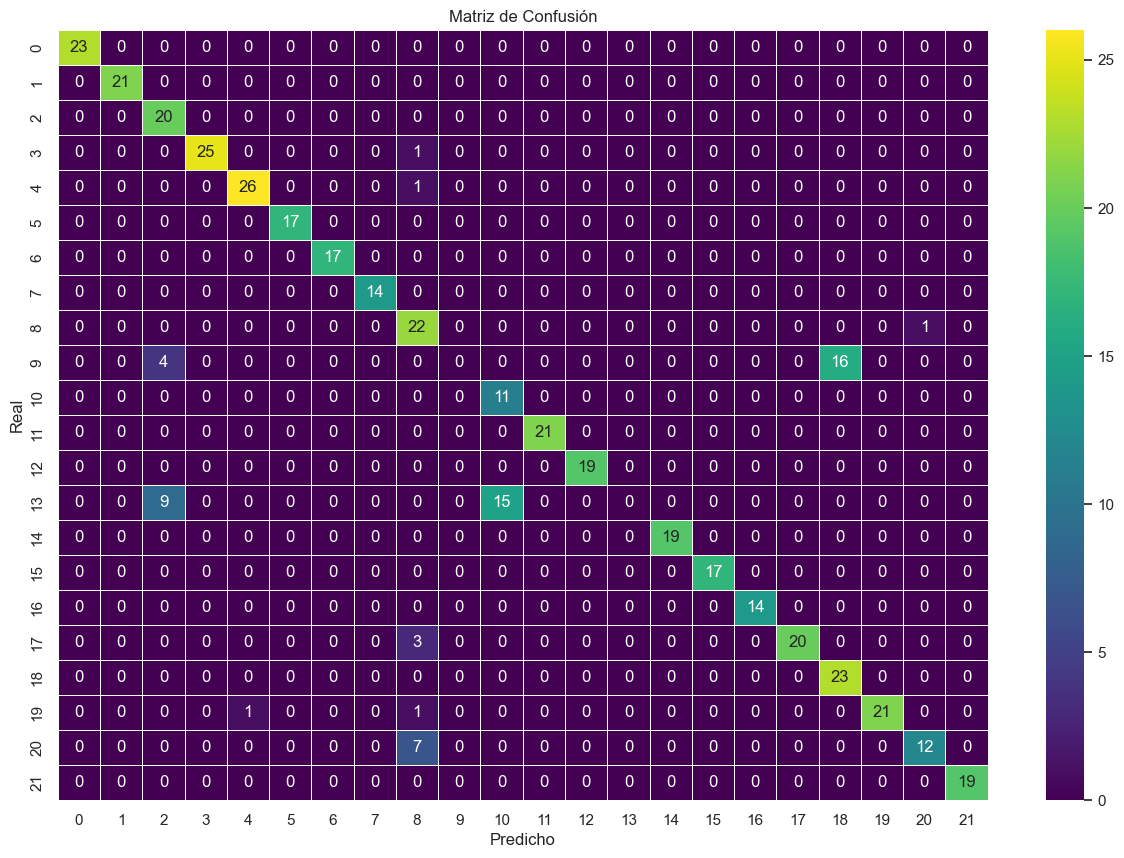

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5) #max_depth son los niveles que va a tener mi arbol, y random_state es mi semilla 

decision_tree_model.fit(X_train, y_train)

# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)  #va a separar en 5 diferentes #me muestra la prepcision del modelo
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)
# Matriz de confusión
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()


In [80]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree


In [81]:
cultivos

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,20,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.775,66.413,6.780,177.775,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2196,99,15,27,27.417,56.636,6.087,127.925,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2197,118,33,30,24.132,67.225,6.363,173.323,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2198,117,32,34,26.272,52.127,6.759,127.175,5,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [82]:
labels= X.columns
targets = LE.classes_
data = Source(tree.export_graphviz(decision_tree_model, out_file=None, feature_names=labels, class_names=targets, filled=True, rounded=True, special_characters=True))
display(SVG(data.pipe(format='svg')))

IndexError: index 10 is out of bounds for axis 0 with size 1

Regresion logistica

In [51]:
import statsmodels.api as sm

logist_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logist_model
result=logist_model.fit(method="bfgs")
stats1=result.summary()

print(stats1)

c:\Users\chiar\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1359: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\chiar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.679007
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
                          MNLogit Regression Results                          
Dep. Variable:        Tipo_de_Cultivo   No. Observations:                 1760
Model:                        MNLogit   Df Residuals:                     1592
Method:                           MLE   Df Model:                          147
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.7802
Time:                        10:35:07   Log-Likelihood:                -1195.1
converged:                      False   LL-Null:                       -5438.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
     Tipo_de_Cultivo=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0157      3.754     -0.